In [8]:
import pandas as pd
import numpy as np
import polars as pl
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import importlib
import keywords
importlib.reload(keywords)


<module 'keywords' from 'c:\\Users\\leoga\\Documents\\_Schuel\\MA3\\ADA\\project\\ada-2024-project-lil0mohammadali\\keywords.py'>

In [9]:
# loading data

# channels
pl_df_f = pl.read_csv("data/df_channels_en.tsv", separator="\t")
filtered_df_ch = pl_df_f.filter(pl.col("category_cc") == "News & Politics")

#time series
filtered_df_timeseries = pl.read_csv("data/filtered_df_timeseries_en.tsv", separator="\t")

# metadata feather
filtered_df_metadata_feather = pl.read_csv("data/filtered_yt_metadata_helper.feather.csv")

# metadata
filtered_df_metadata = pl.read_csv("data/filtered_yt_metadata.csv",  schema_overrides={
                                "dislike_count": pl.Float64,
                                "like_count": pl.Float64},
                                ignore_errors = True)

print(f"new metadata shape: ({filtered_df_metadata.shape[0]:,}, {filtered_df_metadata.shape[1]:,})")

new metadata shape: (9,503,610, 12)


In [10]:
# counting bad dislike entries
keywords.summarize_outliers(filtered_df_metadata)

Date Outlier Count: 408,705
Like/Dislike Outlier Count (null elements): 721,615


In [11]:
filtered_df_metadata = keywords.filtering_bad_rows(filtered_df_metadata)

Current metadata shape: (9,503,610, 12)
New metadata shape: (8,781,990, 12)


In [12]:
keywords.summarize_outliers(filtered_df_metadata)

Date Outlier Count: 0
Like/Dislike Outlier Count (null elements): 0


In [13]:
## removing the hour time from the upload_date
filtered_df_metadata = keywords.remove_hour(filtered_df_metadata)

Event: 2016 US elections
related videos found: 741,257


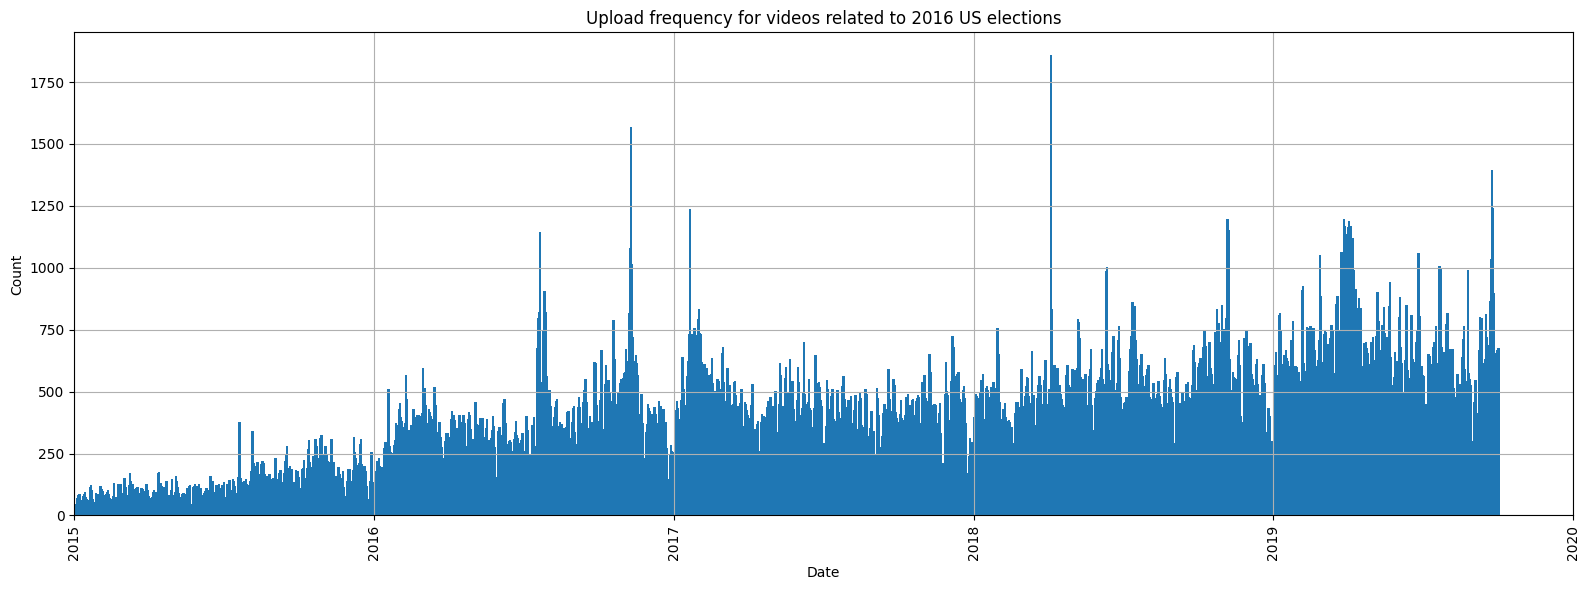

In [15]:
index = 0           # 0-11, decides on the events
keywords.plot_update_frequ(index, filtered_df_metadata)